In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
test_data.shape

(10000, 28, 28)

In [0]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_data, train_labels, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 6s 95us/step - loss: 0.5144 - acc: 0.8194
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.3878 - acc: 0.8603
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3546 - acc: 0.8744
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3378 - acc: 0.8795
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3237 - acc: 0.8864
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.3144 - acc: 0.8905
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3084 - acc: 0.8934
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2999 - acc: 0.8969
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2939 - acc: 0.899

In [9]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 0s 27us/step


[0.3817452680945396, 0.8826]

In [0]:
predictions = model.predict(test_data)

In [11]:
predictions[0]

array([4.6264875e-13, 1.9374801e-22, 9.3101427e-13, 5.0036655e-17,
       4.9660742e-16, 1.4307475e-05, 1.7172389e-11, 7.1846717e-04,
       2.9800002e-09, 9.9926728e-01], dtype=float32)

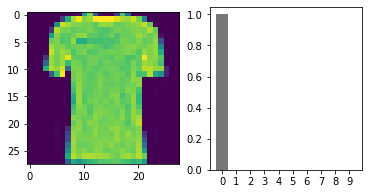

Best prediction:  T-shirt/top  Actual label:  T-shirt/top


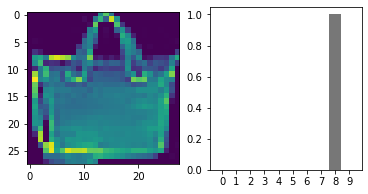

Best prediction:  Bag  Actual label:  Bag


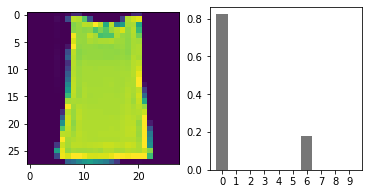

Best prediction:  T-shirt/top  Actual label:  Shirt


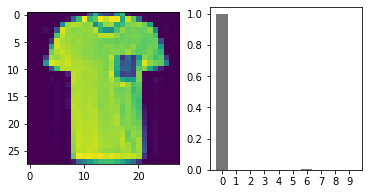

Best prediction:  T-shirt/top  Actual label:  T-shirt/top


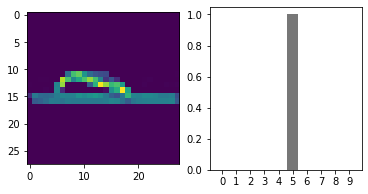

Best prediction:  Sandal  Actual label:  Sandal


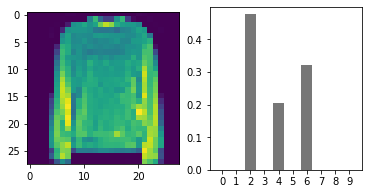

Best prediction:  Pullover  Actual label:  Pullover


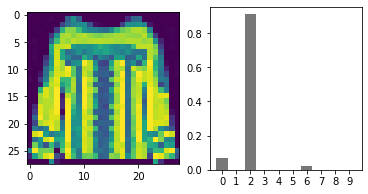

Best prediction:  Pullover  Actual label:  Shirt


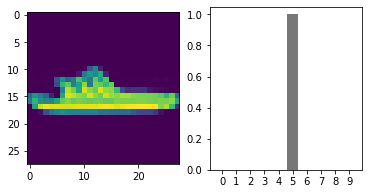

Best prediction:  Sandal  Actual label:  Sandal


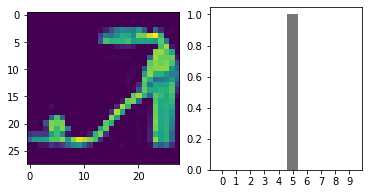

Best prediction:  Sandal  Actual label:  Sandal


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pred(idx=0):
  plt.figure(figsize=(6,3))
  plt.subplot(1, 2, 1)
  plt.imshow(test_data[idx])
  plt.subplot(1, 2, 2)
  plt.xticks(range(10))
  plt.bar(range(10), predictions[idx], color="#777777")
  plt.show()
  print("Best prediction: ", class_names[np.argmax(predictions[idx])], " Actual label: ", class_names[test_labels[idx]])

for i in range(1, 10):
  plot_pred(np.random.randint(len(test_data)))

In [13]:
test_labels == np.argmax(predictions)

array([False, False, False, ..., False, False, False])

In [0]:
best_prediction = [np.argmax(arg) for arg in predictions]

In [0]:
compare_arr = np.array([best_prediction == test_labels])

In [0]:
diff_idx = np.where(compare_arr==False)[1]

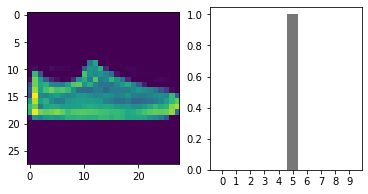

Best prediction:  Sandal  Actual label:  Sneaker


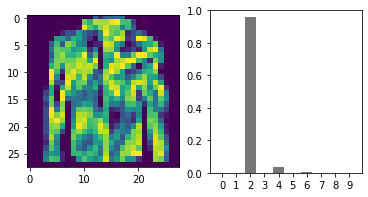

Best prediction:  Pullover  Actual label:  Coat


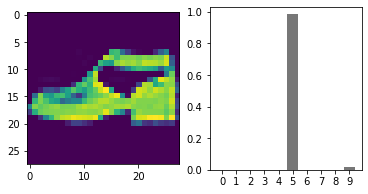

Best prediction:  Sandal  Actual label:  Ankle boot


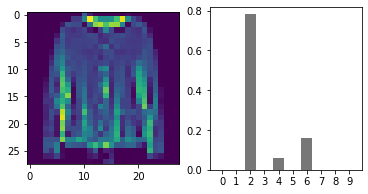

Best prediction:  Pullover  Actual label:  Coat


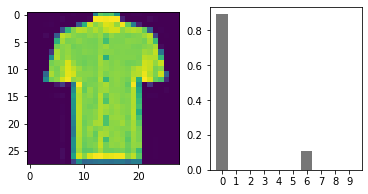

Best prediction:  T-shirt/top  Actual label:  Shirt


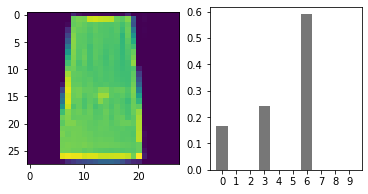

Best prediction:  Shirt  Actual label:  Dress


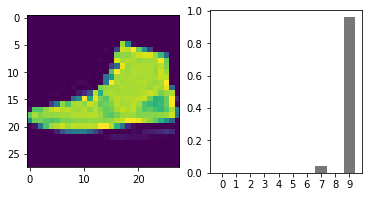

Best prediction:  Ankle boot  Actual label:  Sneaker


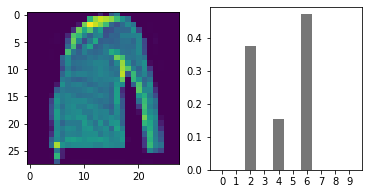

Best prediction:  Shirt  Actual label:  Pullover


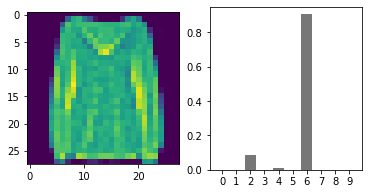

Best prediction:  Shirt  Actual label:  Pullover


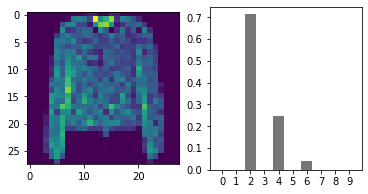

Best prediction:  Pullover  Actual label:  Coat


In [17]:
diff_idx = diff_idx[:10]
for idx in diff_idx:
  plot_pred(idx)